<a href="https://colab.research.google.com/github/BrainConnection/Schroedinger-Practice/blob/main/Slinky%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 0. Ping Pong Ball Free Fall

In [ ]:
tlist = np.array([(1/30)*i for i in range(27)])
ylist = np.array([1.91, 1.91, 1.87, 1.83, 1.77, 1.69, 1.62, 1.53, 1.41, 1.29,
         1.15, 1.03, 0.882, 0.731, 0.563, 0.408, 0.226, 0.0587, -0.106,
         -0.29, -0.466, -0.643, -0.833, -1, -1.17, -1.37, -1.63])

In [ ]:
def func(t, b, a):
    return b - 0.5 * a * t**2
popt, pcov = curve_fit(func, tlist, ylist, p0 = [1.91, 9.8])

In [ ]:
popt

array([1.74829431, 9.5306956 ])

In [ ]:
pcov

array([[0.00128195, 0.00548102],
       [0.00548102, 0.04295722]])

Text(0, 0.5, 'Vertial Position')

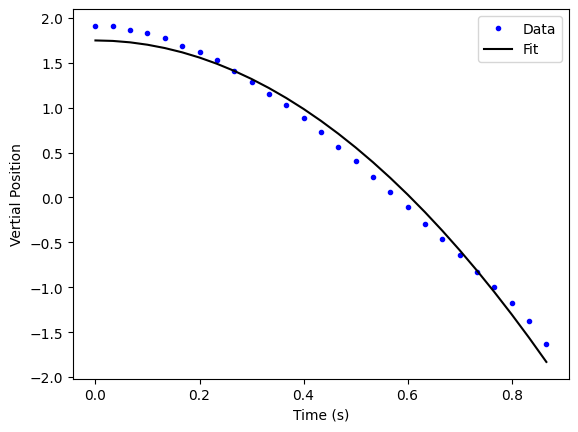

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(tlist, func(tlist, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position')

# 1. Point Mass Modeling (Free Fall)

### 1) Modeling

In [ ]:
# Constant Initialization

N = 10                    # of point mass
omega = 2 * np.pi * 10   # w**2 := k/m, Hz
g = 9.8                   # m/s**2
L_0 = 0.02             # natural length

delta = g / omega ** 2    # stationary length

t_step = 100000
tlist = np.linspace(0,2,t_step)

In [ ]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*L_0])

Y_0 = np.array(lst)

In [ ]:
Y_0

array([[-0.        ],
       [-0.04482369],
       [-0.08716501],
       [-0.12702396],
       [-0.16440055],
       [-0.19929476],
       [-0.2317066 ],
       [-0.26163608],
       [-0.28908319],
       [-0.31404793],
       [-0.33653029]])

In [ ]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [ ]:
A

array([[-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, -2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, -2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, -2,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, -2,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, -2,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, -2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1]])

In [ ]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [ ]:
N_crit

8

In [ ]:
D

array([-3.91898595e+00, -3.68250707e+00, -3.30972147e+00, -2.83083003e+00,
       -2.28462968e+00, -1.71537032e+00, -1.16916997e+00, -6.90278532e-01,
        4.39245429e-16, -8.10140528e-02, -3.17492934e-01])

In [ ]:
P

array([[-6.06832509e-02, -1.20131166e-01, -1.77133557e-01,
        -2.30530019e-01, -2.79233555e-01, -3.22252701e-01,
        -3.58711712e-01, -3.87868386e-01,  3.01511345e-01,
         4.22061281e-01,  4.09129179e-01],
       [ 1.77133557e-01,  3.22252701e-01,  4.09129179e-01,
         4.22061281e-01,  3.58711712e-01,  2.30530019e-01,
         6.06832509e-02, -1.20131166e-01,  3.01511345e-01,
         3.87868386e-01,  2.79233555e-01],
       [-2.79233555e-01, -4.22061281e-01, -3.58711712e-01,
        -1.20131166e-01,  1.77133557e-01,  3.87868386e-01,
         4.09129179e-01,  2.30530019e-01,  3.01511345e-01,
         3.22252701e-01,  6.06832509e-02],
       [ 3.58711712e-01,  3.87868386e-01,  6.06832509e-02,
        -3.22252701e-01, -4.09129179e-01, -1.20131166e-01,
         2.79233555e-01,  4.22061281e-01,  3.01511345e-01,
         2.30530019e-01, -1.77133557e-01],
       [-4.09129179e-01, -2.30530019e-01,  2.79233555e-01,
         3.87868386e-01, -6.06832509e-02, -4.22061281e-01,
  

In [ ]:
P_dag

array([[-6.06832509e-02,  1.77133557e-01, -2.79233555e-01,
         3.58711712e-01, -4.09129179e-01,  4.26401433e-01,
        -4.09129179e-01,  3.58711712e-01, -2.79233555e-01,
         1.77133557e-01, -6.06832509e-02],
       [-1.20131166e-01,  3.22252701e-01, -4.22061281e-01,
         3.87868386e-01, -2.30530019e-01, -4.47181304e-15,
         2.30530019e-01, -3.87868386e-01,  4.22061281e-01,
        -3.22252701e-01,  1.20131166e-01],
       [-1.77133557e-01,  4.09129179e-01, -3.58711712e-01,
         6.06832509e-02,  2.79233555e-01, -4.26401433e-01,
         2.79233555e-01,  6.06832509e-02, -3.58711712e-01,
         4.09129179e-01, -1.77133557e-01],
       [-2.30530019e-01,  4.22061281e-01, -1.20131166e-01,
        -3.22252701e-01,  3.87868386e-01,  4.89641465e-16,
        -3.87868386e-01,  3.22252701e-01,  1.20131166e-01,
        -4.22061281e-01,  2.30530019e-01],
       [-2.79233555e-01,  3.58711712e-01,  1.77133557e-01,
        -4.09129179e-01, -6.06832509e-02,  4.26401433e-01,
  

In [ ]:
X_0 = np.matmul(P_dag, Y_0)

In [ ]:
X_0

array([[-4.22818671e-04],
       [-2.19566594e-03],
       [-1.46139770e-03],
       [-5.48110163e-03],
       [-3.33741963e-03],
       [-1.26442431e-02],
       [-8.37774094e-03],
       [-3.78193602e-02],
       [-6.19820509e-01],
       [ 3.50646345e-01],
       [ 3.51872570e-02]])

In [ ]:
X_0[N_crit][0]

-0.6198205086943424

In [ ]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * L_0])

  elif i==N:
    lst.append([g + omega**2 * L_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [ ]:
G

array([[-69.15683521],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [ 88.75683521]])

In [ ]:
H

array([[ 3.73034936e-14],
       [ 1.89703533e+01],
       [-1.42108547e-13],
       [ 3.64038415e+01],
       [-6.03961325e-14],
       [ 5.08881069e+01],
       [ 6.75015599e-14],
       [ 6.12497205e+01],
       [ 3.25029229e+01],
       [-6.66492460e+01],
       [-4.26325641e-14]])

In [ ]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [ ]:
A_coeff

array([[-4.22818671e-04],
       [-8.90781374e-04],
       [-1.46139770e-03],
       [-2.22368219e-03],
       [-3.33741963e-03],
       [-5.12976770e-03],
       [-8.37774094e-03],
       [-1.53433093e-02],
       [-1.87437046e+13],
       [ 1.42257174e-01],
       [ 3.51872570e-02]])

In [ ]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [ ]:
X

array([[-4.22818671e-04, -4.22817363e-04, -4.22813438e-04, ...,
         3.54026934e-04,  3.53450748e-04,  3.52872375e-04],
       [-2.19566594e-03, -2.19566335e-03, -2.19565558e-03, ...,
        -6.59564754e-04, -6.58085862e-04, -6.56610731e-04],
       [-1.46139770e-03, -1.46139388e-03, -1.46138243e-03, ...,
         1.09348647e-03,  1.09570011e-03,  1.09790802e-03],
       ...,
       [-6.19820509e-01, -6.19820515e-01, -6.19820535e-01, ...,
        -6.56230662e+01, -6.56243663e+01, -6.56256664e+01],
       [ 3.50646345e-01,  3.50646336e-01,  3.50646308e-01, ...,
         1.58087846e-01,  1.58135445e-01,  1.58183050e-01],
       [ 3.51872570e-02,  3.51872482e-02,  3.51872217e-02, ...,
        -4.20757934e-03, -4.23231485e-03, -4.25704823e-03]])

In [ ]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

In [ ]:
Y

array([[-6.93889390e-18, -2.15604284e-08, -8.62416795e-08, ...,
        -1.97155098e+01, -1.97158888e+01, -1.97162677e+01],
       [-4.48236900e-02, -4.48236900e-02, -4.48236900e-02, ...,
        -1.97270886e+01, -1.97274645e+01, -1.97278404e+01],
       [-8.71650110e-02, -8.71650110e-02, -8.71650110e-02, ...,
        -1.97391933e+01, -1.97395738e+01, -1.97399544e+01],
       ...,
       [-2.89083188e-01, -2.89083188e-01, -2.89083188e-01, ...,
        -1.98298089e+01, -1.98302210e+01, -1.98306331e+01],
       [-3.14047926e-01, -3.14047926e-01, -3.14047926e-01, ...,
        -1.98460301e+01, -1.98464469e+01, -1.98468637e+01],
       [-3.36530295e-01, -3.36530295e-01, -3.36530295e-01, ...,
        -1.98645651e+01, -1.98649888e+01, -1.98654125e+01]])

### 2) Plot

Text(0, 0.5, 'Vertical Postion')

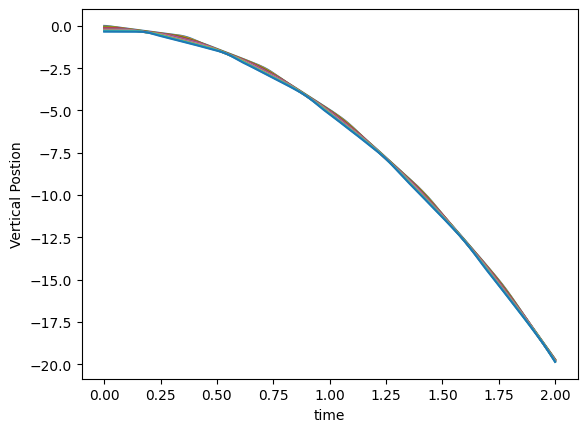

In [ ]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position (m)')

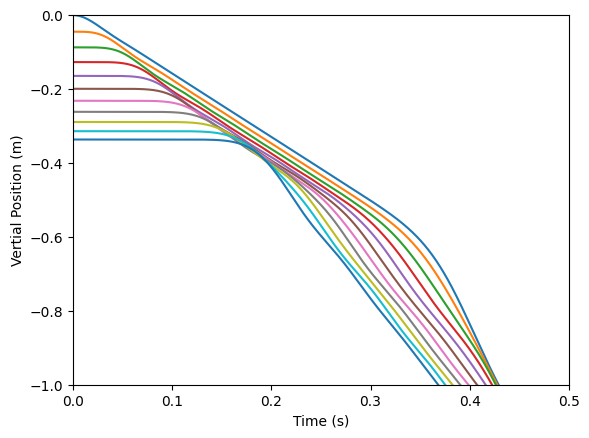

In [ ]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0,0.5)
plt.ylim(-1,0)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertial Position (m)')

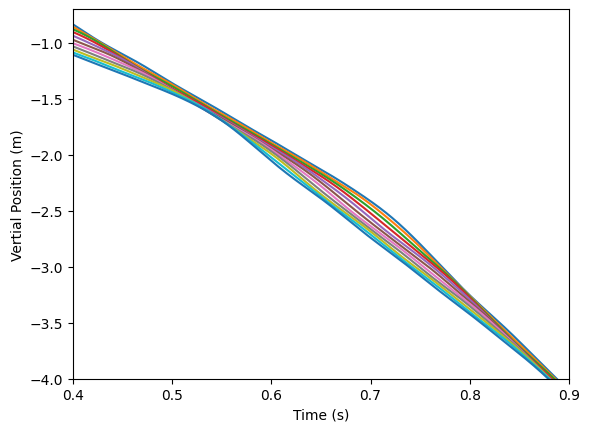

In [ ]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0.4,0.9)
plt.ylim(-4,-0.7)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

# 2. Free Fall Analysis

### 1) Short Plastic Slinky

In [3]:
# Short Plastic Slinky

tlist = np.array([(1/30)*i for i in range(13)])
ylist1 = np.array([0.0, -0.0437, -0.1758, -0.2807, -0.3922, -0.5037, -0.6205, -0.7147, -0.8132, -0.8867, -0.9766, -1.0662, -1.1723])
ylist2 = np.array([-0.0952, -0.1061, -0.3102, -0.3271, -0.4097, -0.5199, -0.6378, -0.7327, -0.826, -0.9026, -0.9913, -1.0969, -1.2163])
ylist3 = np.array([-0.3179, -0.3148, -0.3102, -0.3301, -0.4113, -0.5184, -0.6439, -0.7403, -0.8337, -0.9209, -1.0036, -1.1168, -1.2323])
ylist4 = np.array([-0.4419, -0.4342, -0.4342, -0.4281, -0.4419, -0.5444, -0.6546, -0.751, -0.8459, -0.9362, -1.0143, -1.1505, -1.2515])
ylist5 = np.array([-0.673, -0.673, -0.673, -0.673, -0.6776, -0.6806, -0.676, -0.7648, -0.8597, -0.9561, -1.0602, -1.1888, -1.3035])

In [4]:
# Constant Initialization

L = 0.92                          # total strengthen lengh
l = 0.05                          # total natural length

N = 2000                          # of point mass
g = 9.8                           # m/s**2
l_0 = l/N                         # natural length of spring between point mass

In [5]:
delta_L = L - l
omega = np.sqrt(N*(N+1)*4.9/delta_L)
delta = g / omega ** 2            # stationary length unit

Nlist = []

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist1[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist2[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist3[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist4[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist5[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

In [6]:
Nlist

[0, 109, 392, 573, 990]

In [7]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*l_0])

Y_0 = np.array(lst)

In [8]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [9]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [10]:
X_0 = np.matmul(P_dag, Y_0)

In [11]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * l_0])

  elif i==N:
    lst.append([g + omega**2 * l_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [12]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [13]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [14]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(np.size(tlist)):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertial Position (m)')

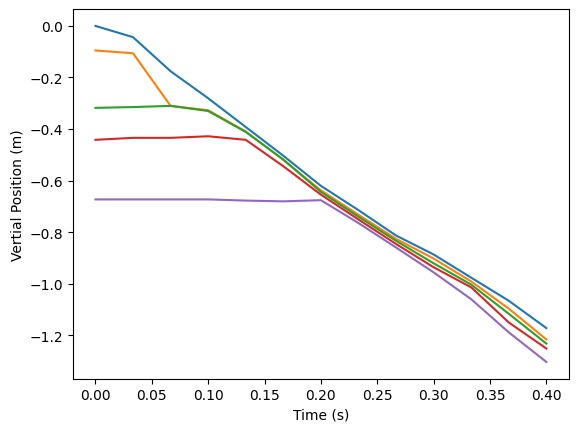

In [15]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)
plt.plot(tlist, ylist5)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertical Postion')

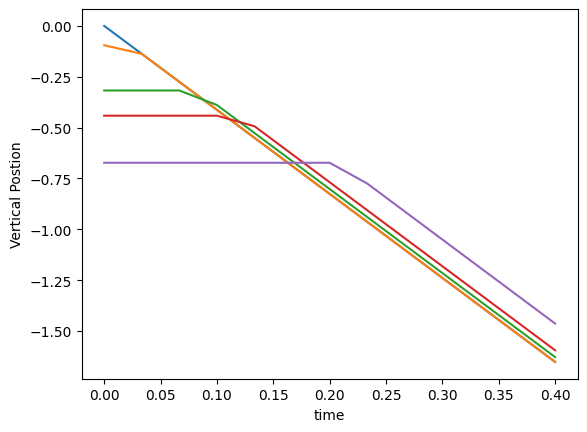

In [16]:
plt.figure()

for i in range(5):
  plt.plot(tlist, Y[Nlist[i]])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position, 1')

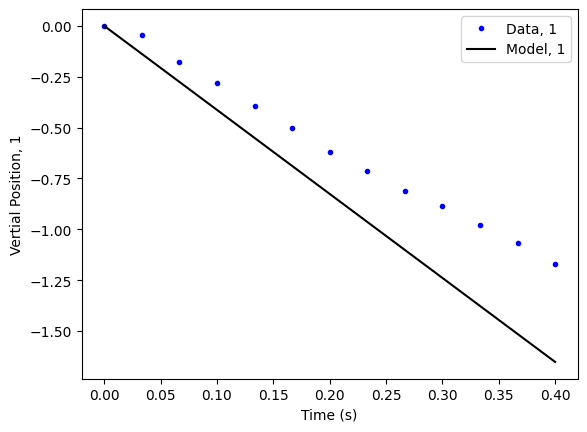

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist1, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[0]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

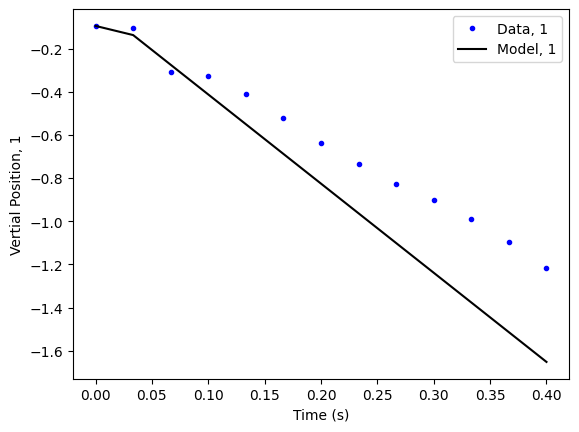

In [18]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist2, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[1]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

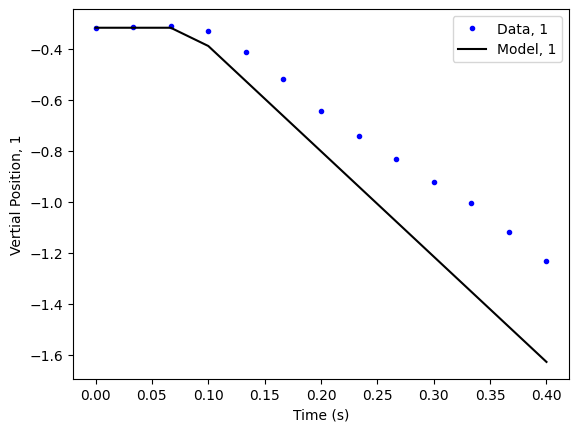

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist3, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[2]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

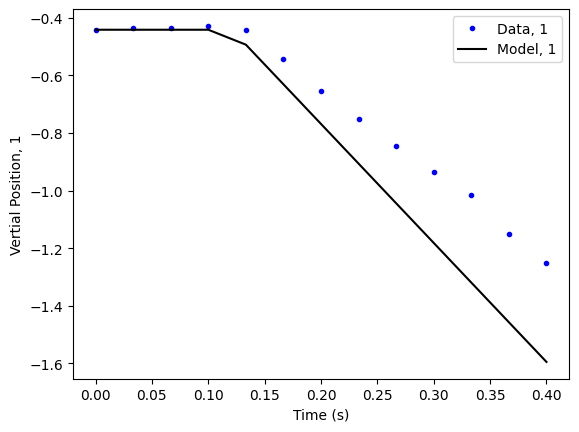

In [20]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist4, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[3]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

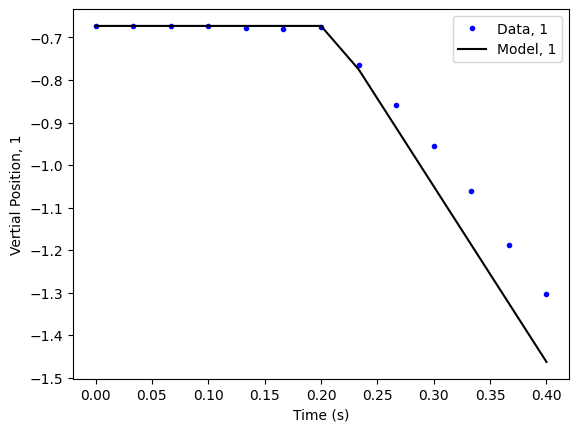

In [21]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist5, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[4]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

### 2) Long Plastic Slinky

In [207]:
# Long Plastic Slinky

tlist = np.array([0.0, 0.04167, 0.08333, 0.125, 0.16667, 0.20833, 0.25, 0.29167, 0.33333, 0.375, 0.41667])
ylist1 = np.array([0.0, -0.029099999999999904, -0.09144999999999992, -0.43855999999999995, -0.61108, -0.7482599999999999, -0.9020699999999999, -1.17435, -1.29698, -1.4113, -1.58144])
ylist2 = np.array([-0.67751, -0.6731, -0.67604, -0.6731, -0.69956, -0.7833399999999999, -0.92297, -1.19341, -1.31247, -1.4271099999999999, -1.55351])
ylist3 = np.array([-1.05525, -1.05525, -1.0567199999999999, -1.05378, -1.05819, -1.05378, -1.06407, -1.2095799999999999, -1.33304, -1.4521, -1.56821])
ylist4 = np.array([-1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.43993, -1.4732699999999999, -1.59737])

In [208]:
# Constant Initialization

L = 1.90                          # total strengthen lengh
l = 0.1                           # total natural length

N = 2000                          # of point mass
g = 9.8                           # m/s**2
l_0 = l/N                         # natural length of spring between point mass

In [209]:
delta_L = L - l
omega = np.sqrt(N*(N+1)*4.9/delta_L)
delta = g / omega ** 2            # stationary length unit

Nlist = []

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist1[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist2[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist3[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist4[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

In [210]:
Nlist

[0, 406, 684, 1047, 1450]

In [211]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*l_0])

Y_0 = np.array(lst)

In [212]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [213]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [214]:
X_0 = np.matmul(P_dag, Y_0)

In [215]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * l_0])

  elif i==N:
    lst.append([g + omega**2 * l_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [216]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [217]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [218]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(np.size(tlist)):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertial Position (m)')

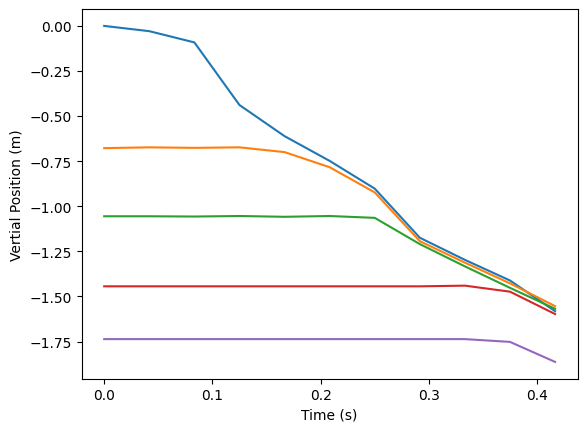

In [219]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertical Postion')

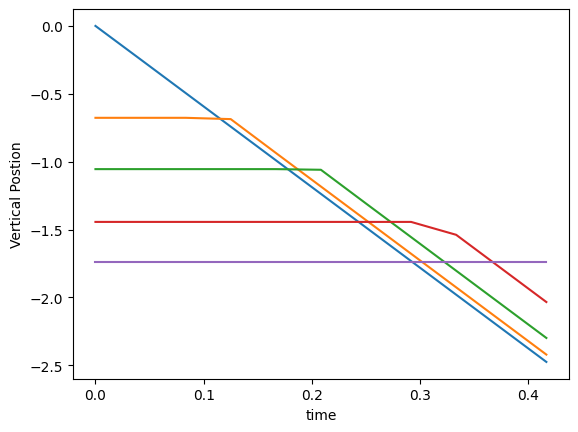

In [220]:
plt.figure()

for i in range(4):
  plt.plot(tlist, Y[Nlist[i]])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position, 1')

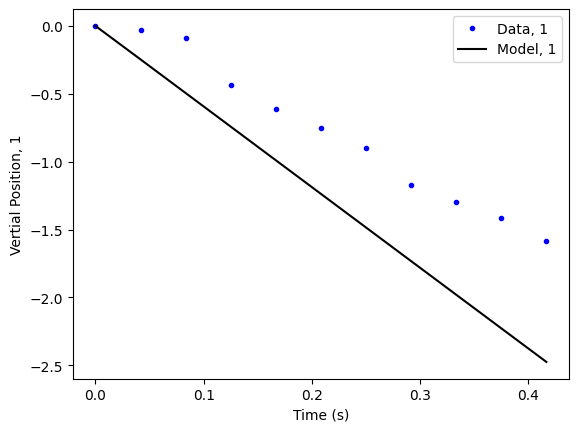

In [221]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist1, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[0]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

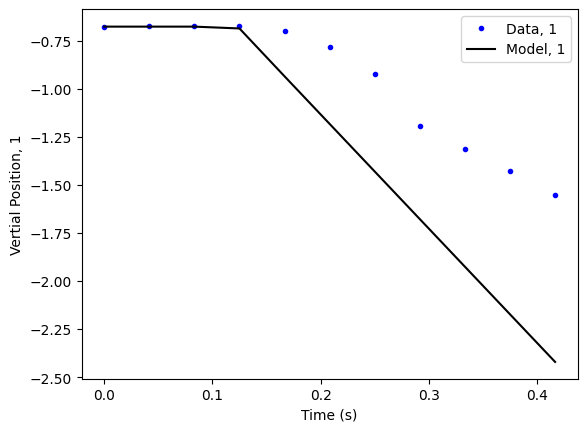

In [222]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist2, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[1]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

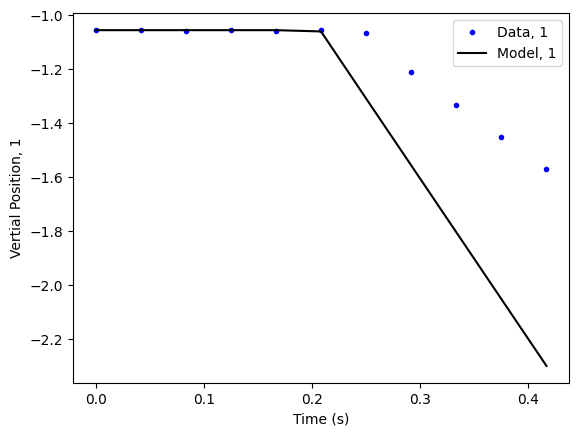

In [223]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist3, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[2]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

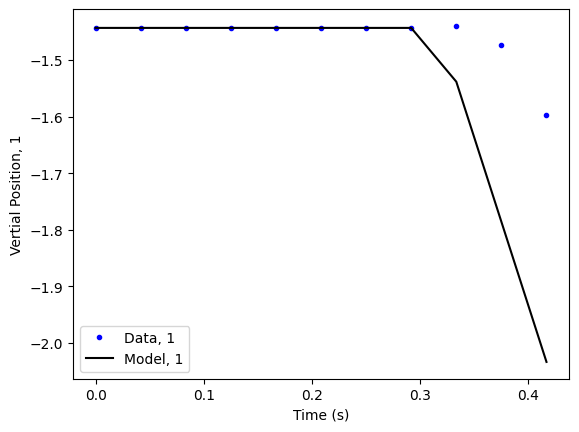

In [224]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist4, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[3]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

### 3) Short Metal Slinky

In [226]:
# Short Metal Slinky

tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3])
ylist1 = np.array([0.0, -0.09033000000000002, -0.21717999999999993, -0.35364999999999996, -0.47858, -0.61312, -0.73228, -0.84376, -0.9437, -1.02827])
ylist2 = np.array([-0.20180999999999993, -0.20372999999999997, -0.23256, -0.37287, -0.49779999999999996, -0.6381, -0.74958, -0.86874, -0.961, -1.05133])
ylist3 = np.array([-0.38824, -0.39593, -0.39593, -0.39785, -0.52855, -0.65924, -0.76295, -0.8803799999999999, -0.97493, -1.06415])
ylist4 = np.array([-0.61959, -0.61959, -0.62112, -0.62798, -0.6317999999999999, -0.6684, -0.7782, -0.8948699999999999, -0.98713, -1.0794])

In [227]:
# Constant Initialization

L = 1.00                          # total strengthen lengh
l = 0.05                          # total natural length

N = 2000                          # of point mass
g = 9.8                           # m/s**2
l_0 = l/N                         # natural length of spring between point mass

In [228]:
delta_L = L - l
omega = np.sqrt(N*(N+1)*4.9/delta_L)
delta = g / omega ** 2            # stationary length unit

Nlist = []

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist1[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist2[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist3[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist4[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist5[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

In [229]:
Nlist

[0, 197, 400, 694, 1356]

In [230]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*l_0])

Y_0 = np.array(lst)

In [231]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [232]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [233]:
X_0 = np.matmul(P_dag, Y_0)

In [234]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * l_0])

  elif i==N:
    lst.append([g + omega**2 * l_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [235]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [236]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [237]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(np.size(tlist)):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertial Position (m)')

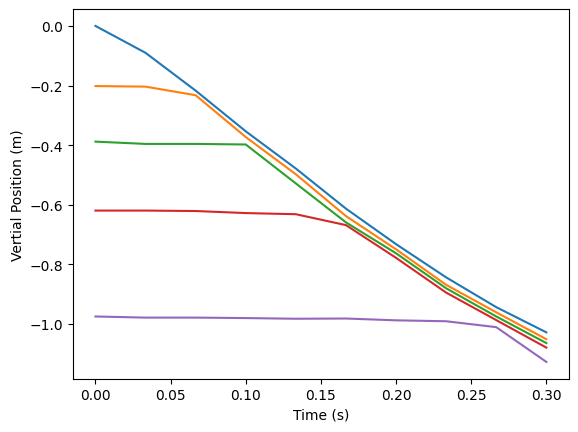

In [238]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertical Postion')

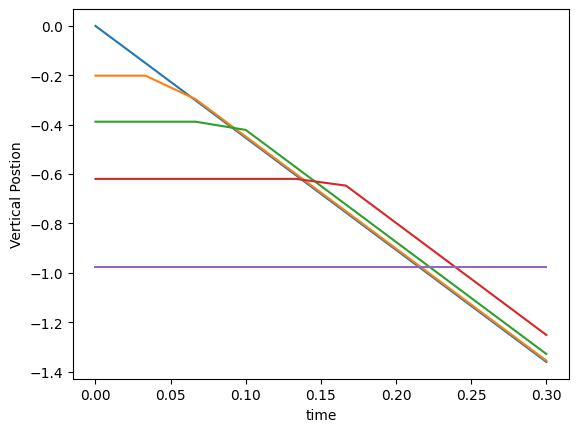

In [239]:
plt.figure()

for i in range(5):
  plt.plot(tlist, Y[Nlist[i]])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position, 1')

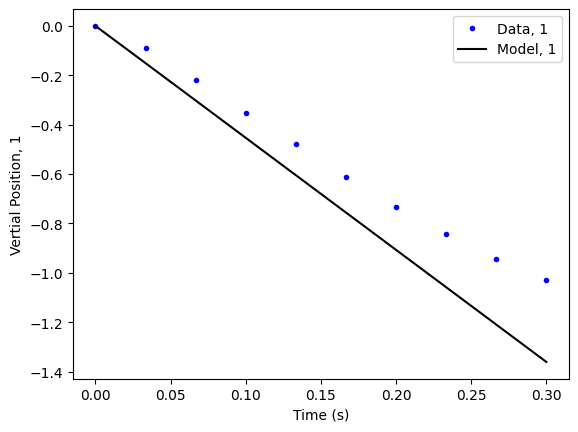

In [240]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist1, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[0]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

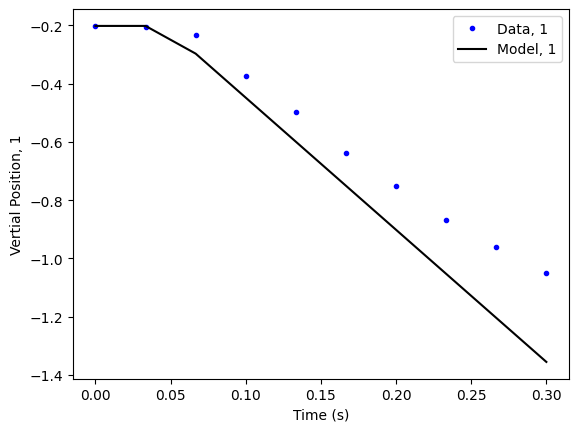

In [241]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist2, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[1]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

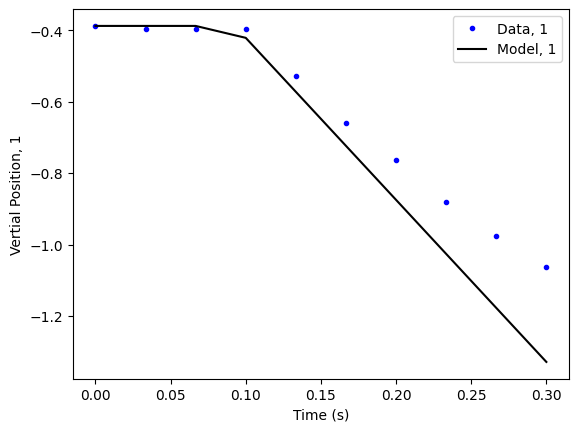

In [242]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist3, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[2]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

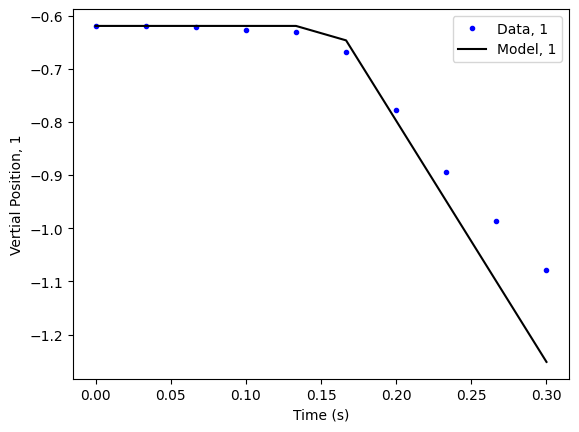

In [243]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist4, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[3]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

# 3. Point Mass Modeling (Transverse Wave & Longitudinal Wave)

### 1) Modeling

In [ ]:
# Constant Initialization

N = 100                    # of point mass
omega = 2 * np.pi * 1   # w**2 := k/m, Hz
omega_0 = 2 * np.pi * 2   # w**2 := k/m, Hz
Amp = 10

t_step = 10000
tlist = np.linspace(0,200,t_step)

In [ ]:
# Position initialization

lst = []
for i in range(N-2):

    lst.append([0])

lst.append([(omega**2)*Amp])

a_0 = np.array(lst)

In [ ]:
a_0

In [ ]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N-1):

  if i==0:
    sub_lst = []
    for j in range(N-1):

      if j==0:
        sub_lst.append(-2)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N-2:
    sub_lst = []
    for j in range(N-1):

      if j==N-3:
        sub_lst.append(+1)

      elif j==N-2:
        sub_lst.append(-2)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N-1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [ ]:
A

array([[-2,  1,  0, ...,  0,  0,  0],
       [ 1, -2,  1, ...,  0,  0,  0],
       [ 0,  1, -2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -2,  1,  0],
       [ 0,  0,  0, ...,  1, -2,  1],
       [ 0,  0,  0, ...,  0,  1, -2]])

In [ ]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

In [ ]:
D

array([-3.99901312e+00, -3.99605346e+00, -3.99112393e+00, -3.98422940e+00,
       -3.97537668e+00, -3.96457450e+00, -3.95183352e+00, -3.93716632e+00,
       -3.83550925e+00, -3.85955297e+00, -3.88176154e+00, -3.80965410e+00,
       -3.78201305e+00, -3.75261336e+00, -3.90211303e+00, -3.72148405e+00,
       -3.58031002e+00, -3.61803399e+00, -3.54102649e+00, -3.50022214e+00,
       -3.65416115e+00, -3.45793725e+00, -3.41421356e+00, -3.36909421e+00,
       -3.92058737e+00, -3.22581411e+00, -3.17557050e+00, -3.12416676e+00,
       -3.07165359e+00, -3.27484798e+00, -3.01808283e+00, -2.96350735e+00,
       -2.90798100e+00, -2.67747584e+00, -2.73624911e+00, -2.79429578e+00,
       -2.61803399e+00, -2.55798221e+00, -2.49737977e+00, -9.86879269e-04,
       -3.94654314e-03, -8.87607079e-03, -1.57705974e-02, -2.46233188e-02,
       -2.43628648e+00, -3.54254985e-02, -4.81664761e-02, -2.37476263e+00,
       -6.28336777e-02, -9.78869674e-02, -1.18238462e-01, -1.40447028e-01,
       -1.64490749e-01, -

In [ ]:
P

array([[-0.00444215, -0.00887992, -0.01330893, ...,  0.10608172,
         0.0394553 ,  0.07577735],
       [ 0.00887992,  0.0177248 ,  0.02649972, ...,  0.14030621,
         0.07577735,  0.12796187],
       [-0.01330893, -0.02649972, -0.0394553 , ...,  0.07949059,
         0.10608172,  0.14030621],
       ...,
       [-0.01330893,  0.02649972, -0.0394553 , ...,  0.07949059,
         0.10608172, -0.14030621],
       [ 0.00887992, -0.0177248 ,  0.02649972, ...,  0.14030621,
         0.07577735, -0.12796187],
       [-0.00444215,  0.00887992, -0.01330893, ...,  0.10608172,
         0.0394553 , -0.07577735]])

In [ ]:
P_dag

array([[-0.00444215,  0.00887992, -0.01330893, ..., -0.01330893,
         0.00887992, -0.00444215],
       [-0.00887992,  0.0177248 , -0.02649972, ...,  0.02649972,
        -0.0177248 ,  0.00887992],
       [-0.01330893,  0.02649972, -0.0394553 , ..., -0.0394553 ,
         0.02649972, -0.01330893],
       ...,
       [ 0.10608172,  0.14030621,  0.07949059, ...,  0.07949059,
         0.14030621,  0.10608172],
       [ 0.0394553 ,  0.07577735,  0.10608172, ...,  0.10608172,
         0.07577735,  0.0394553 ],
       [ 0.07577735,  0.12796187,  0.14030621, ..., -0.14030621,
        -0.12796187, -0.07577735]])

In [ ]:
f_0 = np.matmul(P_dag, a_0)

In [ ]:
f_0

array([[ -1.75369138],
       [  3.50565207],
       [ -5.25415311],
       [  6.99746893],
       [ -8.7338791 ],
       [-10.46166998],
       [ 12.17913646],
       [ 13.8845836 ],
       [-22.17312957],
       [ 20.55273009],
       [-18.91204756],
       [ 23.77164684],
       [ 25.34670436],
       [-26.89674775],
       [-17.25270111],
       [ 28.4202473 ],
       [-34.21916076],
       [ 32.81658763],
       [ 35.5879637 ],
       [-36.92164561],
       [-31.3816285 ],
       [-38.21889032],
       [ 39.4784176 ],
       [ 40.69898445],
       [-15.57632834],
       [ 44.11507622],
       [-45.16815791],
       [-46.17666408],
       [-47.13959946],
       [ 43.01845828],
       [ 48.05601374],
       [ 48.92500254],
       [ 49.74570827],
       [-52.53023292],
       [ 51.91027065],
       [ 51.23907921],
       [ 53.09835419],
       [ 53.61407379],
       [ 54.07688278],
       [  1.75369138],
       [ -3.50565207],
       [ -5.25415311],
       [  6.99746893],
       [ -8

In [ ]:
lst = []

for i in range(N-1):
  sub_arr = f_0[i][0]/(omega**2*(-D[i]) - omega_0**2) * np.sin(omega_0 * tlist) - (omega_0/(np.sqrt(-D[i]) * omega)) * f_0[i][0]/(omega**2 * (-D[i])-omega_0**2) * np.sin(np.sqrt(-D[i]) * omega * tlist)
  lst.append(sub_arr)

X = np.array(lst)

In [ ]:
X

array([[ 0.00000000e+00, -2.92069448e-05, -2.29249465e-04, ...,
         1.10026566e+01,  1.27701437e+01,  1.37354457e+01],
       [ 0.00000000e+00,  5.83852026e-05,  4.58277004e-04, ...,
        -1.13394806e+01, -1.68444586e+01, -2.12922109e+01],
       [ 0.00000000e+00, -8.75061141e-05, -6.86860893e-04, ...,
        -9.47629173e+00, -2.22365087e+00,  5.16894681e+00],
       ...,
       [ 0.00000000e+00,  6.99317661e-04,  5.53279337e-03, ...,
        -1.88895951e-01, -3.33348130e-01, -4.78378682e-01],
       [ 0.00000000e+00,  2.60222419e-04,  2.06174563e-03, ...,
         6.28363983e-01,  5.89779210e-01,  5.48913136e-01],
       [ 0.00000000e+00, -4.99688206e-04, -3.95684320e-03, ...,
         2.31686885e-01,  3.24856555e-01,  4.19389309e-01]])

In [ ]:
lst = []

for i in range(N-1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N-1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N-1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

In [ ]:
Y

array([[ 0.00000000e+00, -1.41217333e-17, -7.94178091e-17, ...,
         5.33762333e-01,  4.34488940e-01,  3.42260947e-01],
       [ 0.00000000e+00,  5.19468366e-17,  2.24104589e-16, ...,
         9.08063974e-01,  1.32298911e+00,  1.65707287e+00],
       [ 0.00000000e+00, -1.06699046e-16, -2.89373560e-16, ...,
        -2.42278134e+00, -2.93440491e+00, -3.28488597e+00],
       ...,
       [ 0.00000000e+00,  1.96073863e-09,  2.49327178e-07, ...,
         3.81806109e+00,  1.68757318e+00, -5.45700094e-01],
       [ 0.00000000e+00,  5.20964756e-06,  1.65209056e-04, ...,
        -4.81396682e+00, -2.72419743e+00, -4.71598580e-01],
       [ 0.00000000e+00,  6.58536200e-03,  5.19372560e-02, ...,
         5.33094741e+00,  3.22439343e+00,  9.34578468e-01]])

### 2) Plot

Text(0, 0.5, 'Vertical Postion')

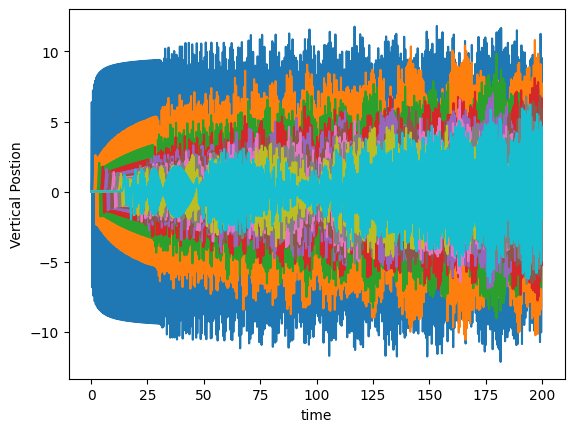

In [ ]:
num = (int)(N/10)

plt.figure()

for i in range(num):
  plt.plot(tlist, Y[N-2-10*i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

In [ ]:
t_step = 1000
tlist = np.linspace(0,20,t_step)

In [ ]:
lst = []

for i in range(N-1):
  sub_arr = f_0[i][0]/(omega**2*(-D[i]) - omega_0**2) * np.sin(omega_0 * tlist) - (omega_0/(np.sqrt(-D[i]) * omega)) * f_0[i][0]/(omega**2 * (-D[i])-omega_0**2) * np.sin(np.sqrt(-D[i]) * omega * tlist)
  lst.append(sub_arr)

X = np.array(lst)

In [ ]:
lst = []

for i in range(N-1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N-1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N-1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertical Postion')

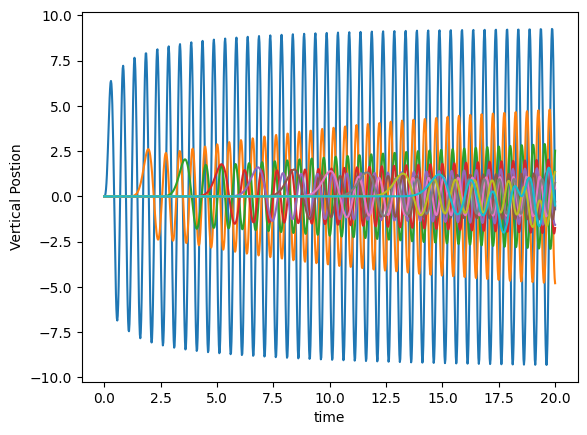

In [ ]:
num = (int)(N/10)

plt.figure()

for i in range(num):
  plt.plot(tlist, Y[N-2-10*i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

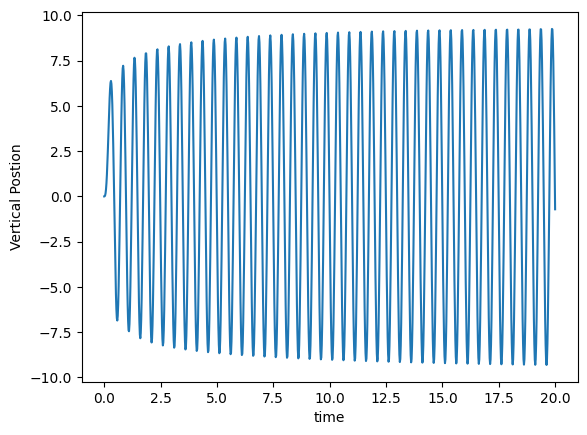

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-2], label = '{0}'.format(N-2))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

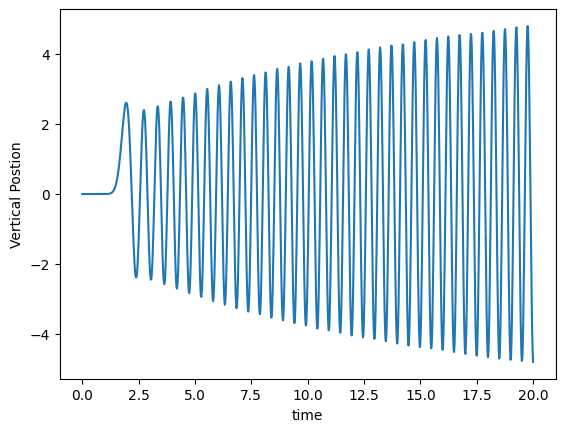

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-12], label = '{0}'.format(N-12))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

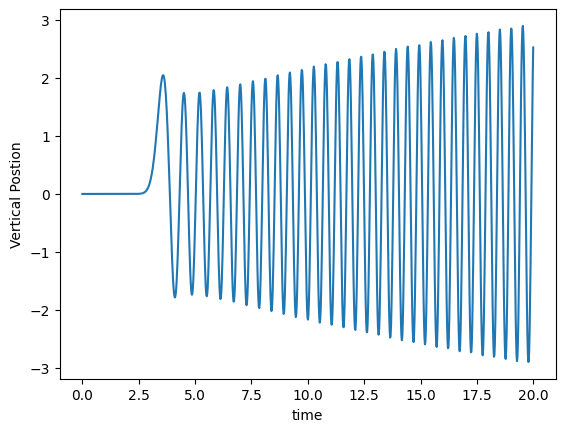

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-22], label = '{0}'.format(N-22))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

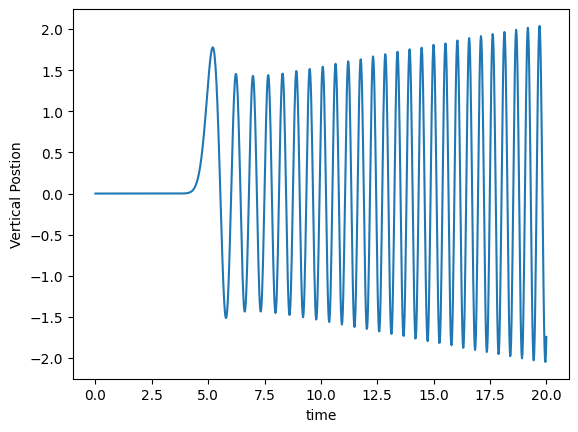

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-32], label = '{0}'.format(N-32))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

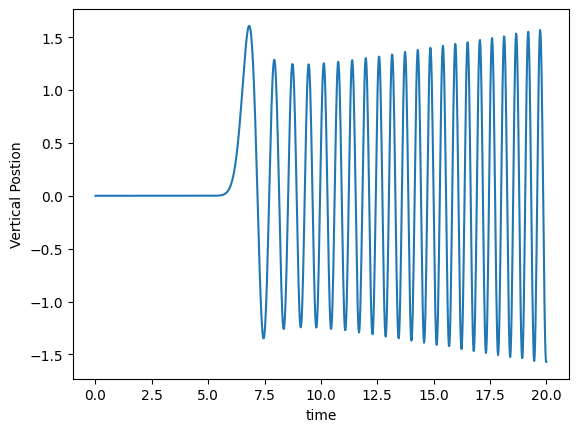

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-42], label = '{0}'.format(N-42))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

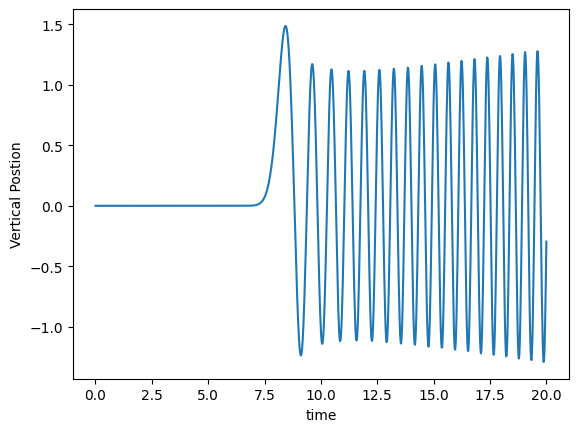

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-52], label = '{0}'.format(N-52))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

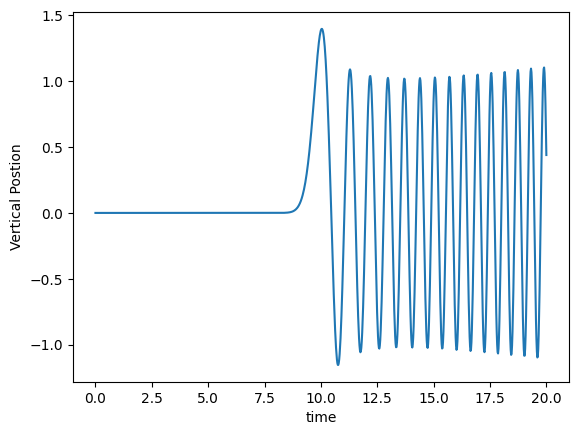

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-62])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

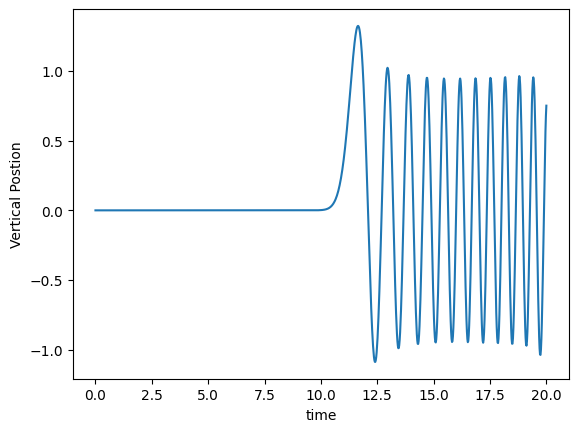

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-72])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

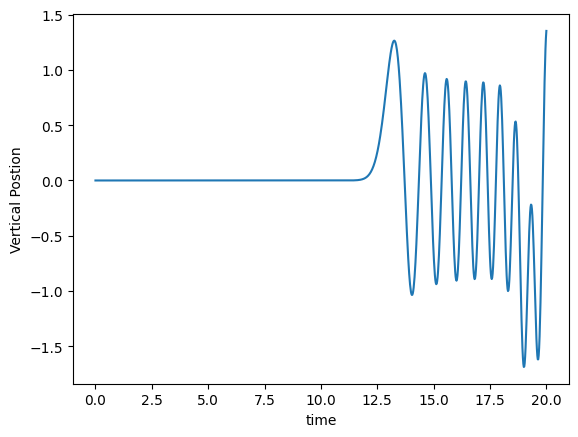

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-82])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertical Postion')

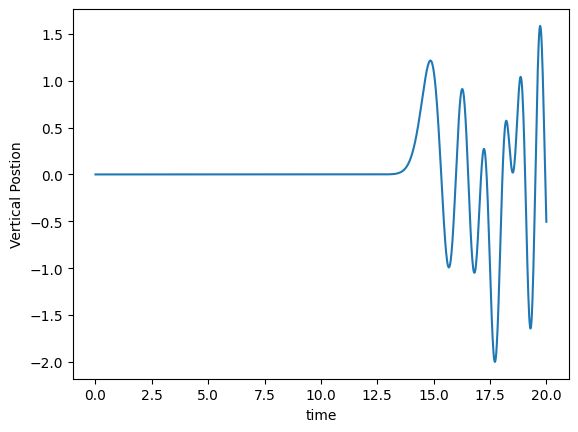

In [ ]:
plt.figure()

plt.plot(tlist, Y[N-92])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

### 3) Wave Velocity

# 4. Trans Wave Analysis

### 1) Short Metal Transwave

In [252]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1])
ylist1 = np.array([0.01875, 0.01291, 0.02041, 0.0158, 0.02552, 0.03996, 0.0544, 0.06626, 0.06827, 0.06055, 0.04625, 0.02996, 0.01089, -0.00318, -0.01543, -0.02338, -0.02202, -0.01566, -0.0034, 0.01158, 0.02905, 0.04562, 0.0572, 0.06264, 0.05765, 0.05084, 0.03949, 0.0261, 0.01135, 0.0, -0.01021, -0.0168, -0.01702, -0.01089])
ylist2 = np.array([0.0227, 0.02111, 0.01793, 0.01838, 0.02633, 0.03336, 0.04539, 0.05901, 0.07286, 0.08171, 0.08103, 0.07104, 0.05629, 0.03949, 0.02111, 0.00409, -0.00862, -0.0143, -0.01271, -0.00159, 0.01089, 0.02633, 0.04335, 0.05901, 0.07059, 0.06968, 0.05651, 0.04358, 0.032, 0.01997, 0.0118, 0.00431, 0.00545, 0.01044])
ylist3 = np.array([0.04698, 0.04744, 0.04903, 0.04812, 0.04812, 0.05016, 0.05175, 0.05379, 0.06015, 0.06741, 0.08148, 0.09192, 0.09782, 0.09101, 0.07944, 0.06264, 0.0438, 0.0261, 0.01316, 0.00477, 0.00613, 0.01226, 0.02088, 0.03087, 0.04131, 0.05198, 0.0606, 0.06559, 0.06605, 0.06287, 0.06128, 0.05765, 0.05447, 0.05152])
ylist4 = np.array([0.04857, 0.04993, 0.05493, 0.0572, 0.0581, 0.05651, 0.05266, 0.04993, 0.05129, 0.05334, 0.0581, 0.06219, 0.07172, 0.08262, 0.0892, 0.08284, 0.07263, 0.06242, 0.05061, 0.03087, 0.01453, 0.00045, -0.00182, -0.00182, 0.00704, 0.02156, 0.03745, 0.05447, 0.07127, 0.08489, 0.09124, 0.08829, 0.08171, 0.06809])
ylist5 = np.array([0.0581, 0.0572, 0.06083, 0.06105, 0.06174, 0.06174, 0.05788, 0.05765, 0.05924, 0.06128, 0.06105, 0.05992, 0.06128, 0.06446, 0.06854, 0.07422, 0.08103, 0.07808, 0.06673, 0.05583, 0.04244, 0.02837, 0.02156, 0.02292, 0.02792, 0.03586, 0.04517, 0.05425, 0.06264, 0.06923, 0.07762, 0.07989, 0.07422, 0.06423])

Text(0, 0.5, 'Vertial Position (m)')

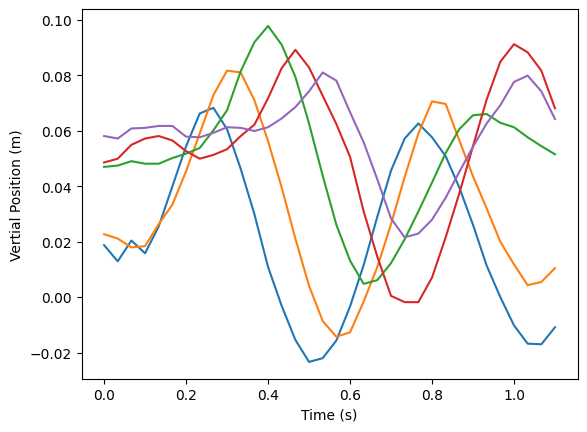

In [258]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)
plt.plot(tlist, ylist5)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Veritcal Position (m)')

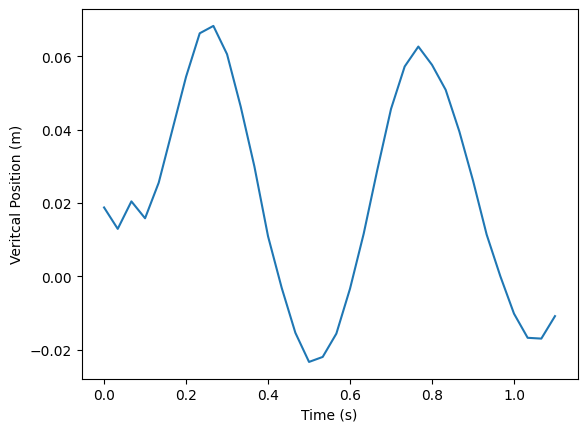

In [253]:
plt.figure()

plt.plot(tlist, ylist1)

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')

Text(0, 0.5, 'Veritcal Position (m)')

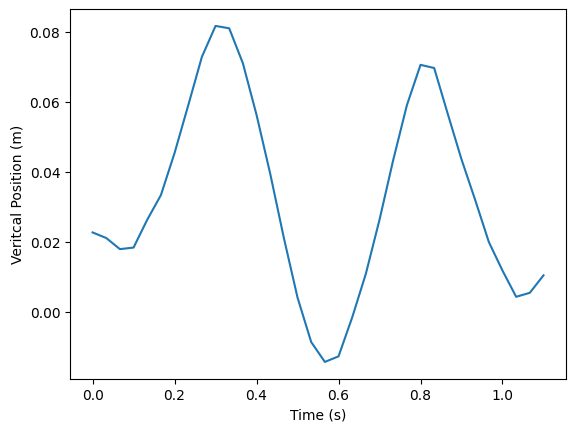

In [254]:
plt.figure()

plt.plot(tlist, ylist2)

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')

Text(0, 0.5, 'Veritcal Position (m)')

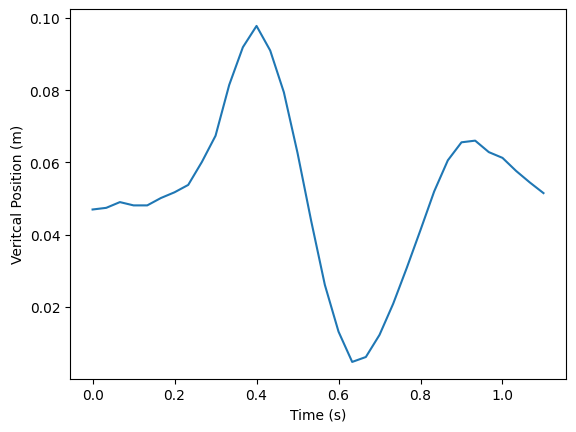

In [255]:
plt.figure()

plt.plot(tlist, ylist3)

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')

Text(0, 0.5, 'Veritcal Position (m)')

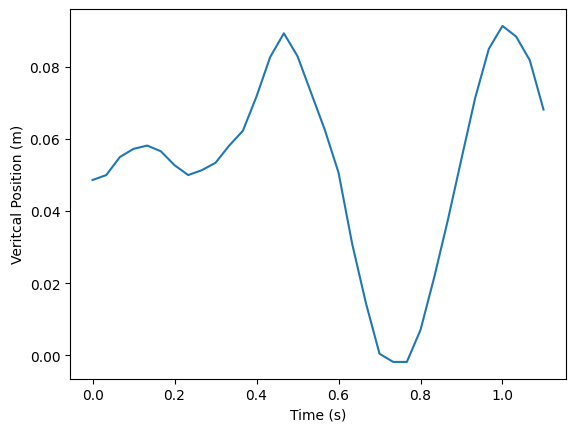

In [256]:
plt.figure()

plt.plot(tlist, ylist4)

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')

Text(0, 0.5, 'Veritcal Position (m)')

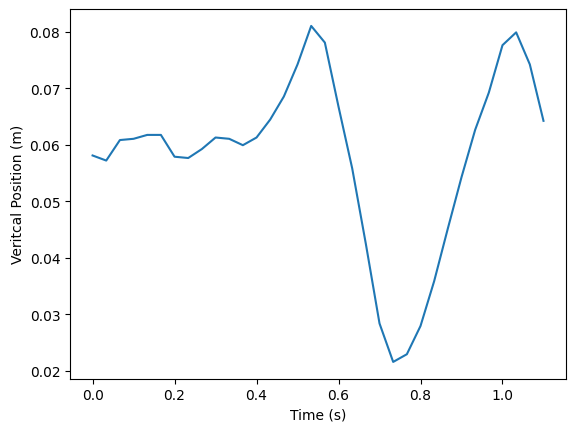

In [257]:
plt.figure()

plt.plot(tlist, ylist5)

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')

# 5. Long Wave Analysis

### 1) Short Metal LongWave

In [246]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1, 1.13333, 1.16667, 1.2, 1.23333, 1.26667, 1.3, 1.33333, 1.36667, 1.4, 1.43333, 1.46667, 1.5, 1.53333, 1.56667, 1.6, 1.63333, 1.66667, 1.7, 1.73333, 1.76667, 1.8, 1.83333, 1.86667, 1.9, 1.93, 1.97])
xlist1 = np.array([0.17817, 0.18025, 0.18233, 0.18337, 0.19014, 0.19326, 0.19832, 0.20051, 0.20197, 0.20372, 0.2069, 0.20722, 0.20927, 0.21094, 0.21423, 0.21555, 0.21581, 0.21598, 0.21609, 0.21685, 0.21945, 0.21971, 0.22182, 0.22283, 0.22361, 0.22529, 0.22551, 0.22561, 0.22881, 0.22881, 0.23087, 0.23089, 0.23401, 0.23437, 0.23521, 0.23784, 0.23991, 0.24051, 0.24077, 0.24129, 0.24255, 0.244, 0.24441, 0.24525, 0.24546, 0.24711, 0.24721, 0.24831, 0.24831, 0.24984, 0.25091, 0.251, 0.25143, 0.25481, 0.25585, 0.25597, 0.25611, 0.25819, 0.25845, 0.25923])
xlist2 = np.array([0.13, 0.12922, 0.12974, 0.12922, 0.1287, 0.12142, 0.11206, 0.09568, 0.08164, 0.07228, 0.06916, 0.06968, 0.07358, 0.0793, 0.08502, 0.09178, 0.0988, 0.10686, 0.11544, 0.12064, 0.12246, 0.1196, 0.11752, 0.1131, 0.1066, 0.10088, 0.0923, 0.08684, 0.08762, 0.0923, 0.09698, 0.10426, 0.11284, 0.1222, 0.13078, 0.13546, 0.1404, 0.13988, 0.13806, 0.13572, 0.13208, 0.12532, 0.1183, 0.10972, 0.10426, 0.10374, 0.10556, 0.10842, 0.11206, 0.11544, 0.1209, 0.12428, 0.1274, 0.1287, 0.12974, 0.13052, 0.12922, 0.12298, 0.11505, 0.10569])
xlist3 = np.array([0.01459, 0.0143, 0.01459, 0.01401, 0.01415, 0.01401, 0.01386, 0.01255, 0.007, -0.0054, -0.01853, -0.03079, -0.039, -0.04082, -0.04056, -0.03848, -0.03562, -0.03146, -0.02626, -0.02184, -0.01638, -0.00962, -0.00572, -0.00468, -0.00416, -0.00494, -0.00416, -0.00312, -0.00338, -0.00546, -0.00754, -0.00754, -0.0065, -0.00442, 0.00026, 0.0039, 0.00832, 0.01248, 0.0143, 0.01508, 0.0143, 0.0143, 0.01378, 0.01066, 0.00624, 0.00026, -0.00728, -0.01248, -0.01092, -0.01066, -0.00832, -0.00442, 0.0, 0.00078, 0.00286, 0.00364, 0.00416, 0.00468, 0.00494, 0.00494])
xlist4 = np.array([-0.11374, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.12301, -0.13135, -0.1434, -0.1522, -0.16332, -0.16795, -0.16517, -0.16193, -0.1573, -0.15498, -0.15174, -0.14525, -0.13552, -0.1244, -0.11699, -0.11004, -0.10818, -0.10911, -0.11699, -0.1193, -0.12486, -0.12625, -0.13135, -0.12718, -0.12718, -0.12394, -0.12394, -0.12069, -0.11699, -0.11745, -0.11621, -0.11582, -0.11517, -0.11511, -0.11595, -0.11771, -0.12083, -0.12434, -0.12889, -0.13324, -0.13513, -0.1335, -0.13188, -0.1298, -0.12752, -0.12577, -0.12473, -0.12466, -0.12479])
xlist5 = np.array([-0.24664, -0.24729, -0.24727, -0.24792, -0.24749, -0.24778, -0.24814, -0.24822, -0.24851, -0.24873, -0.24902, -0.24975, -0.24975, -0.2496, -0.25362, -0.26225, -0.27499, -0.28287, -0.28889, -0.2912, -0.2846, -0.27545, -0.26758, -0.25982, -0.25322, -0.24928, -0.245, -0.24094, -0.24187, -0.24198, -0.24291, -0.24349, -0.24662, -0.24812, -0.25032, -0.25218, -0.25322, -0.25472, -0.25449, -0.25322, -0.25241, -0.2509, -0.24905, -0.24743, -0.24685, -0.24824, -0.24905, -0.24928, -0.24882, -0.24916, -0.25055, -0.25438, -0.25808, -0.25993, -0.26144, -0.25982, -0.25739, -0.25553, -0.25357, -0.25322])

Text(0, 0.5, 'Horizontal Position (m)')

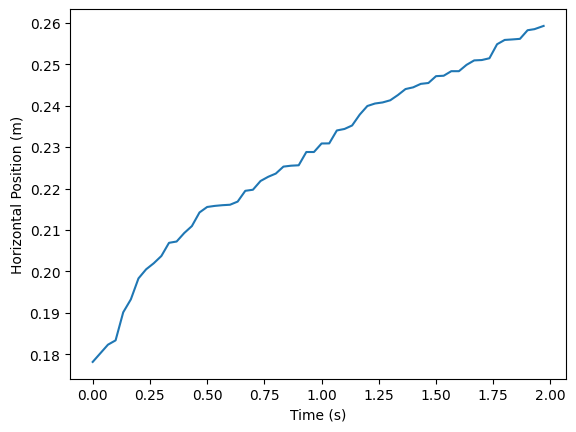

In [247]:
plt.figure()

plt.plot(tlist, xlist1)

plt.xlabel('Time (s)')
plt.ylabel('Horizontal Position (m)')

Text(0, 0.5, 'Horizontal Position (m)')

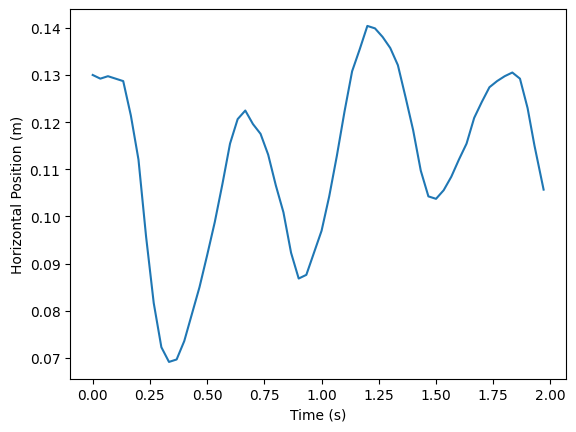

In [248]:
plt.figure()

plt.plot(tlist, xlist2)

plt.xlabel('Time (s)')
plt.ylabel('Horizontal Position (m)')

Text(0, 0.5, 'Horizontal Position (m)')

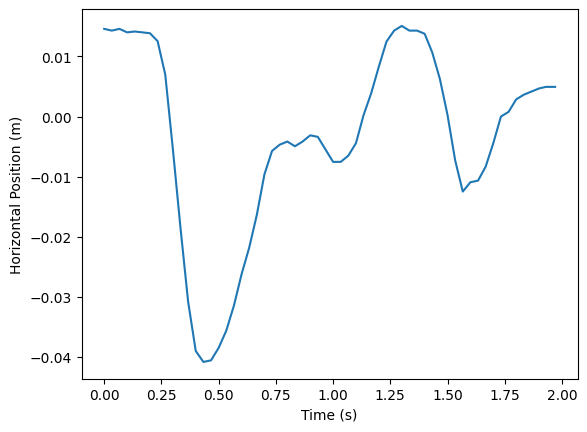

In [249]:
plt.figure()

plt.plot(tlist, xlist3)

plt.xlabel('Time (s)')
plt.ylabel('Horizontal Position (m)')

Text(0, 0.5, 'Horizontal Position (m)')

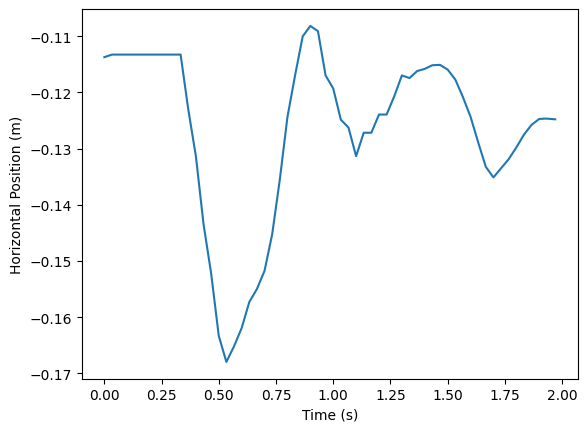

In [250]:
plt.figure()

plt.plot(tlist, xlist4)

plt.xlabel('Time (s)')
plt.ylabel('Horizontal Position (m)')

Text(0, 0.5, 'Horizontal Position (m)')

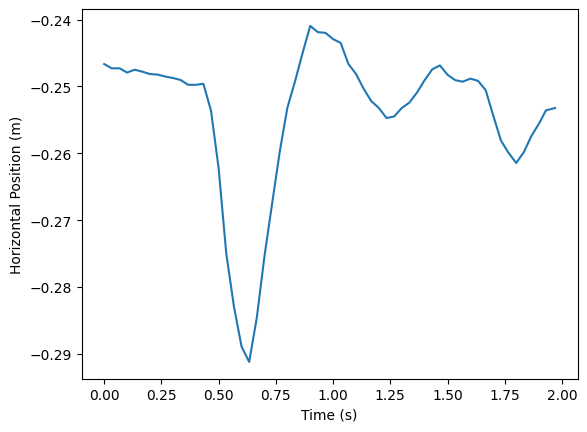

In [251]:
plt.figure()

plt.plot(tlist, xlist5)

plt.xlabel('Time (s)')
plt.ylabel('Horizontal Position (m)')